In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# creating synthetic data points for classification
from sklearn.datasets import make_classification

### When data points are linealy separable, using linear kernel

In [53]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1 ,n_classes=2,)

In [54]:
X

array([[ 0.94399238,  1.05834137],
       [ 0.06657706,  1.05939006],
       [-0.95444859, -0.96606482],
       ...,
       [-1.06820087, -0.40552302],
       [-1.87399318, -1.51112581],
       [-0.76555399, -0.73281322]], shape=(1000, 2))

In [26]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,

In [55]:
pd.DataFrame(X)[0]

0      0.943992
1      0.066577
2     -0.954449
3      1.337914
4     -0.979977
         ...   
995   -1.720859
996    1.950554
997   -1.068201
998   -1.873993
999   -0.765554
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

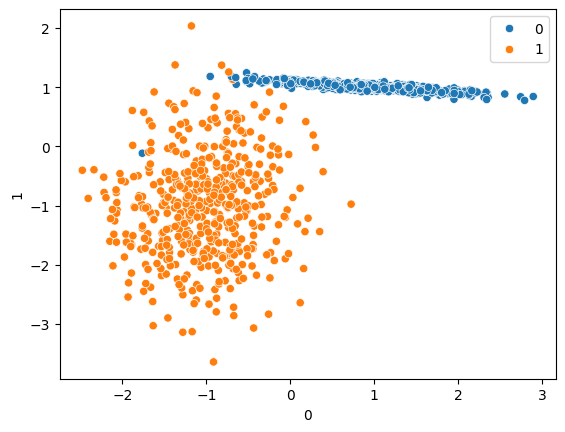

In [56]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# since datapoints are linearly separable we can use linear kernel
model = SVC(kernel='linear')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [59]:
y_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        92
           1       1.00      0.97      0.99       108

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

[[ 92   0]
 [  3 105]]
0.985


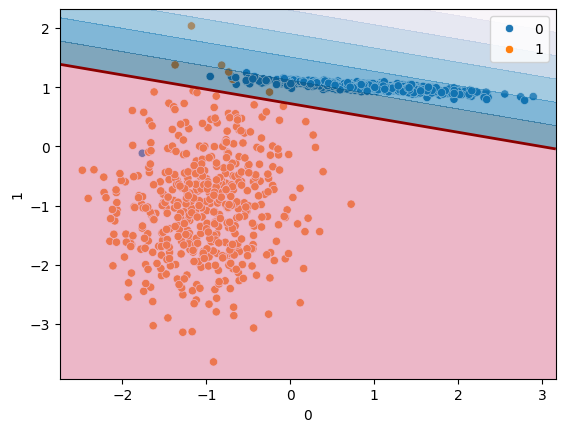

In [61]:
# Hyperplane visualization
def plot_hyperplane(model, X, y):   
    ax = sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.5)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    ax.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)
    plt.show()

plot_hyperplane(model, X, y)

### When data points are linealy separable, using linear kernel

<Axes: xlabel='0', ylabel='1'>

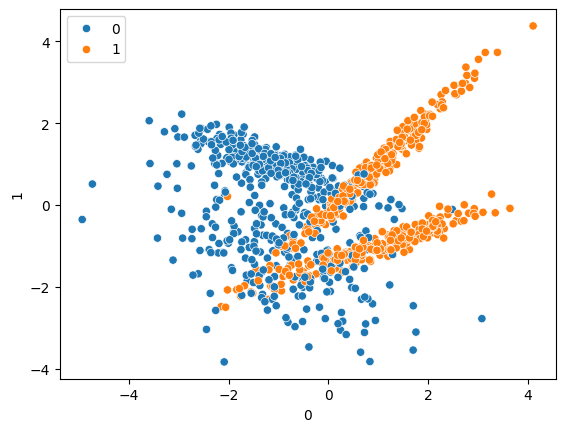

In [89]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,n_classes=2,random_state=56)
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [93]:
model = SVC(kernel='linear')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       104
           1       0.82      0.89      0.85        96

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

[[85 19]
 [11 85]]


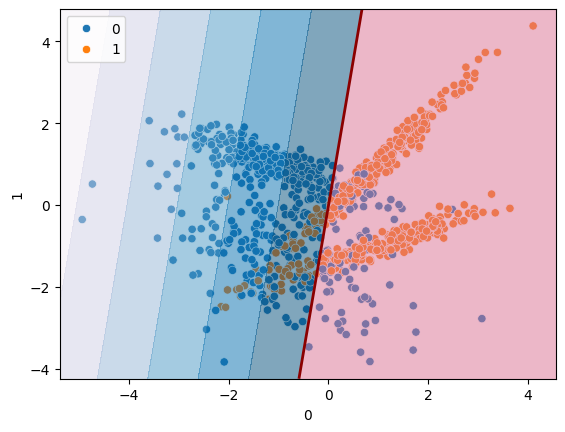

In [94]:
# Hyperplane visualization
def plot_hyperplane(model, X, y):   
    ax = sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.5)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    ax.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)
    plt.show()

plot_hyperplane(model, X, y)

In [90]:
model = SVC(kernel='rbf')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       104
           1       0.87      0.94      0.90        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

[[90 14]
 [ 6 90]]


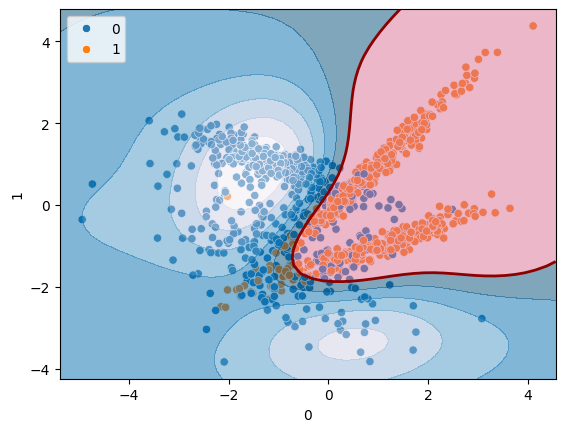

In [92]:
# Hyperplane visualization
def plot_hyperplane(model, X, y):   
    ax = sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.5)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    ax.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)
    plt.show()

plot_hyperplane(model, X, y)

In [96]:
model = SVC(kernel='poly')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       104
           1       0.73      0.85      0.79        96

    accuracy                           0.78       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200

[[74 30]
 [14 82]]


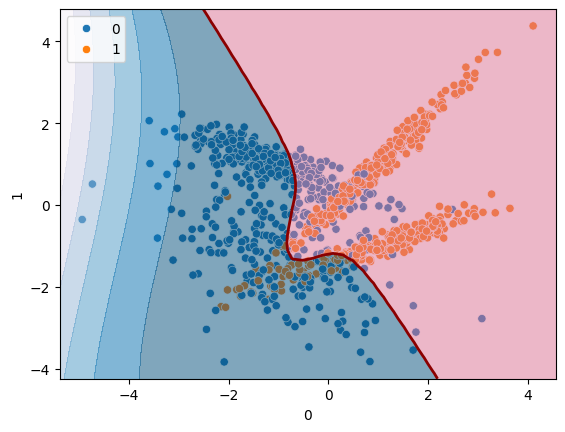

In [97]:
# Hyperplane visualization
def plot_hyperplane(model, X, y):   
    ax = sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.5)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    ax.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)
    plt.show()

plot_hyperplane(model, X, y)

In [98]:
model = SVC(kernel='sigmoid')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       104
           1       0.67      0.69      0.68        96

    accuracy                           0.69       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.69      0.69      0.69       200

[[71 33]
 [30 66]]


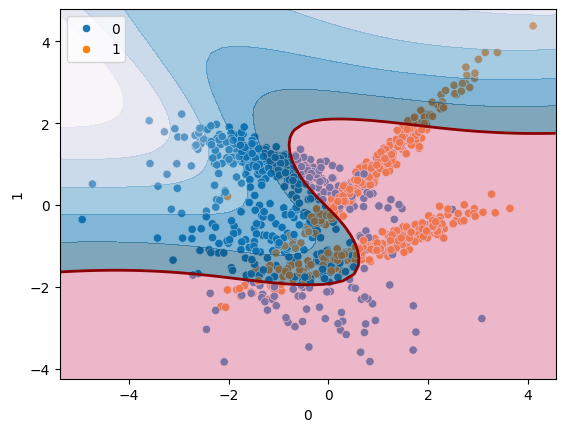

In [99]:
# Hyperplane visualization
def plot_hyperplane(model, X, y):   
    ax = sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu, alpha=0.5)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    ax.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred', alpha=0.5)
    plt.show()

plot_hyperplane(model, X, y)